In [207]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Markdown
import seaborn as sns

In [208]:
data_inactivity = pd.read_csv('inactivity.csv', usecols=['FIPS', '% INACTIVE']) #FIPDS
data_obesity = pd.read_csv('obesity.csv', usecols=['FIPS', '% OBESE'])
data_diabetes = pd.read_csv('diabetes.csv', usecols=['FIPS', '% DIABETIC',])

inac_ob = pd.merge(data_inactivity, data_obesity, on='FIPS', how='inner')

common_dataset = pd.merge(inac_ob, data_diabetes, on='FIPS', how='inner')

font_size_text = "<h2>**5 Point Summary**</h2>"
display(Markdown(font_size_text))

common_dataset


<h2>**5 Point Summary**</h2>

,FIPS,% INACTIVE,% OBESE,% DIABETIC
0,1011,17.0,18.7,9.4
1,2068,16.2,18.9,6.8
2,2105,15.0,19.4,7.3
3,2195,17.8,17.2,9.2
4,2230,15.8,18.3,6.6
...,...,...,...,...
349,51820,16.6,19.5,8.6
350,51830,15.7,18.0,8.5
351,51840,16.1,19.4,6.9
352,53055,11.9,19.3,4.5


In [209]:
obes_data = np.sqrt(data_obesity.iloc[:, 1]).values #sqrt transformed array of obesity
diab_data = np.log(data_diabetes.iloc[:, 1]).values #log transformed diabetes data
inac_data = data_inactivity.iloc[:, 1].values #inacivity data

In [210]:
q1_inac = np.percentile(inac_data, 25)
q1_obes = np.percentile(obes_data, 25)
q1_diab = np.percentile(diab_data, 25)

median_inac = np.percentile(inac_data, 50)
median_obes = np.percentile(obes_data, 50)
median_diab = np.percentile(diab_data, 50)

q3_inac = np.percentile(inac_data, 75)
q3_obes = np.percentile(obes_data, 75)
q3_diab = np.percentile(diab_data, 75)

iqr_inac = q3_inac - q1_inac
iqr_obes = q3_obes - q1_obes
iqr_diab = q3_diab - q1_diab

lower_bound_inac = q1_inac - 1.5 * iqr_inac
lower_bound_obes = q1_obes - 1.5 * iqr_obes
lower_bound_diab = q1_diab - 1.5 * iqr_diab

upper_bound_inac = q1_inac + 1.5 * iqr_inac
upper_bound_obes = q1_obes + 1.5 * iqr_obes
upper_bound_diab = q1_diab + 1.5 * iqr_diab

for i in ["inac","obes", "diab"]:
    print('\n')
    print("First Quartile for " + i + "\t :", locals()[f"q1_{i}"])
    print("Median for " + i + "\t :", locals()[f"median_{i}"])
    print("Third Quartile for " + i+ "\t :", locals()[f"q3_{i}"])
    print("IQR for " + i+ "\t :", locals()[f"iqr_{i}"])
    print("Lowerbound for " + i+ "\t :", locals()[f"lower_bound_{i}"])
    print("Upper bound for " + i+ "\t :", locals()[f"upper_bound_{i}"])



First Quartile for inac	 : 15.0
Median for inac	 : 16.7
Third Quartile for inac	 : 18.1
IQR for inac	 : 3.1000000000000014
Lowerbound for inac	 : 10.349999999999998
Upper bound for inac	 : 19.650000000000002


First Quartile for obes	 : 4.230839160261236
Median for obes	 : 4.277849927241488
Third Quartile for obes	 : 4.358898943540674
IQR for obes	 : 0.12805978327943812
Lowerbound for obes	 : 4.038749485342079
Upper bound for obes	 : 4.422928835180393


First Quartile for diab	 : 1.9878743481543455
Median for diab	 : 2.128231705849268
Third Quartile for diab	 : 2.272125885509337
IQR for diab	 : 0.2842515373549914
Lowerbound for diab	 : 1.5614970421218584
Upper bound for diab	 : 2.414251654186833


In [239]:
inac_column = common_dataset.iloc[:, 1]  # Extracting the inactivity percentage column
obes_column = np.sqrt(common_dataset.iloc[:, 2])
diab_column = np.log(common_dataset.iloc[:, 3])

# Find outliers indices
outliers_inac = (inac_column < lower_bound_inac) | (inac_column > upper_bound_inac)
outliers_obes = (obes_column < lower_bound_obes) | (obes_column > upper_bound_obes)
outliers_diab = (diab_column < lower_bound_diab) | (diab_column > upper_bound_diab)
all_outliers = outliers_inac | outliers_obes | outliers_diab
# Remove outliers
filtered_dataset = common_dataset.loc[~all_outliers]
filtered_dataset

,FIPS,% INACTIVE,% OBESE,% DIABETIC
0,1011,17.0,18.7,9.4
1,2068,16.2,18.9,6.8
2,2105,15.0,19.4,7.3
3,2195,17.8,17.2,9.2
4,2230,15.8,18.3,6.6
...,...,...,...,...
347,51735,13.9,18.5,7.0
348,51181,15.7,19.0,7.9
349,51820,16.6,19.5,8.6
350,51830,15.7,18.0,8.5


In [214]:
X = filtered_dataset.iloc[:, 1:-1].values
y = filtered_dataset.iloc[:, -1].values
filtered_dataset

,FIPS,% INACTIVE,% OBESE,% DIABETIC
0,1011,17.0,18.7,9.4
1,2068,16.2,18.9,6.8
2,2105,15.0,19.4,7.3
3,2195,17.8,17.2,9.2
4,2230,15.8,18.3,6.6
...,...,...,...,...
347,51735,13.9,18.5,7.0
348,51181,15.7,19.0,7.9
349,51820,16.6,19.5,8.6
350,51830,15.7,18.0,8.5


/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

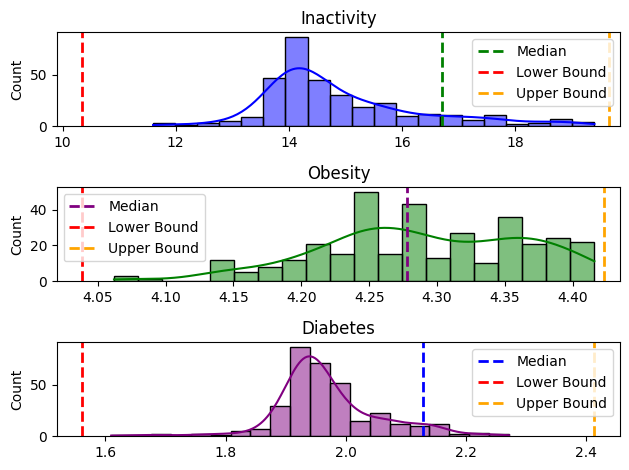

In [238]:
fig, axes = plt.subplots(3, 1)

# Plot histograms with KDE for inactivity
sns.histplot(filtered_dataset.iloc[:, 1].values, bins=20, kde=True, color='blue', ax=axes[0])
axes[0].axvline(median_inac, color='green', linestyle='dashed', linewidth=2, label='Median')
axes[0].axvline(lower_bound_inac, color='red', linestyle='dashed', linewidth=2, label='Lower Bound')
axes[0].axvline(upper_bound_inac, color='orange', linestyle='dashed', linewidth=2, label='Upper Bound')
axes[0].set_title('Inactivity')
axes[0].legend()

# Plot histograms with KDE for obesity
sns.histplot(np.sqrt(filtered_dataset.iloc[:, 2]).values, bins=20, kde=True, color='green', ax=axes[1])
axes[1].axvline(median_obes, color='purple', linestyle='dashed', linewidth=2, label='Median')
axes[1].axvline(lower_bound_obes, color='red', linestyle='dashed', linewidth=2, label='Lower Bound')
axes[1].axvline(upper_bound_obes, color='orange', linestyle='dashed', linewidth=2, label='Upper Bound')
axes[1].set_title('Obesity')
axes[1].legend()

# Plot histograms with KDE for diabetes
sns.histplot(np.log(filtered_dataset.iloc[:, -1]).values, bins=20, kde=True, color='purple', ax=axes[2])
axes[2].axvline(median_diab, color='blue', linestyle='dashed', linewidth=2, label='Median')
axes[2].axvline(lower_bound_diab, color='red', linestyle='dashed', linewidth=2, label='Lower Bound')
axes[2].axvline(upper_bound_diab, color='orange', linestyle='dashed', linewidth=2, label='Upper Bound')
axes[2].set_title('Diabetes')
axes[2].legend()

# Display the plots
plt.tight_layout()
plt.show()

In [105]:
font_size_text = "<h2>Removing outliers from common data</h2>"
display(Markdown(font_size_text))

<h2>Removing outliers from common data</h2>

In [217]:

#Check if data is normal
from scipy.stats import shapiro
from scipy.stats import boxcox

X = filtered_dataset.iloc[:, 1:-1].values
y = filtered_dataset.iloc[:, -1].values

# Assuming 'inactivity_percentage' is the column of interest
data1 = data_inactivity[ '% INACTIVE']
data2 = data_obesity[ '% OBESE']
data3 = data_diabetes[ '% DIABETIC']

# Shapiro-Wilk test for normality
stat, p_value = shapiro(data3)
print(p_value)
# Check the p-value
if p_value > 0.05:
    print("The data appears to be normally distributed.")
else:
    print("The data does not appear to be normally distributed.")

1.348526384579359e-33
The data does not appear to be normally distributed.


In [226]:
# X = filtered_dataset.iloc[:, 1:-1].values
# y = filtered_dataset.iloc[:, -1].values

X = dataset.iloc[:, 1:-1].values
X[:, 1] = np.sqrt(X[:, 1])
y = np.log(dataset.iloc[:, -1].values)


,FIPS,% INACTIVE,% OBESE,% DIABETIC
0,1011,17.0,18.7,9.4
1,2068,16.2,18.9,6.8
2,2105,15.0,19.4,7.3
3,2195,17.8,17.2,9.2
4,2230,15.8,18.3,6.6
...,...,...,...,...
347,51735,13.9,18.5,7.0
348,51181,15.7,19.0,7.9
349,51820,16.6,19.5,8.6
350,51830,15.7,18.0,8.5


In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [139]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [140]:
print("Intercept:", regressor.intercept_)
print("Coefficient for Inactivity (B1):", regressor.coef_[0])
print("Coefficient for Obesity (B2):", regressor.coef_[1])

Intercept: 0.686564462589341
Coefficient for Inactivity (B1): 0.03203370607290505
Coefficient for Obesity (B2): 0.18562871685278498


In [ ]:
# A 1% increase in inactivity is associated with an estimated increase of 0.032% in the Diabetes Rate, holding other variables constant.
# A 1% increase in obesity is associated with an estimated increase of 0.186% in the Diabetes Rate, holding other variables constant.

In [110]:
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)
np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [227]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'Mean Squared Error on Training Set: {mse_train}')
print(f'Mean Squared Error on Testing Set: {mse_test}')

Mean Squared Error on Training Set: 0.007564517873210884
Mean Squared Error on Testing Set: 0.005732144386985127


Text(0.5, 1.0, 'Actual vs Predicted Diabetes Percentage (Training Data)')

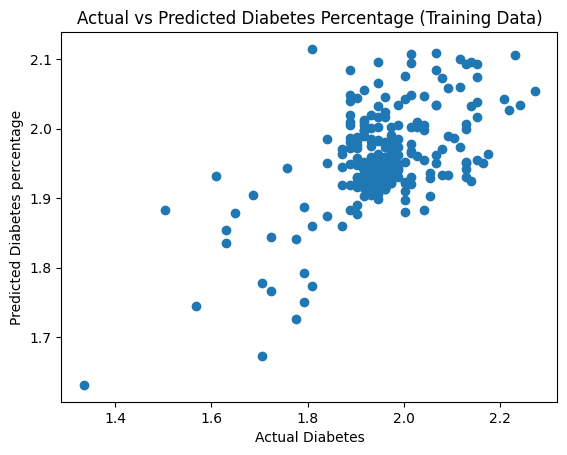

In [111]:
import matplotlib.pyplot as plt

plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual Diabetes")
plt.ylabel("Predicted Diabetes percentage")
plt.title("Actual vs Predicted Diabetes Percentage (Training Data)")

In [112]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.36493625545062025

Text(0.5, 1.0, 'Actual vs Predicted Diabetes Percentage (Testing Data)')

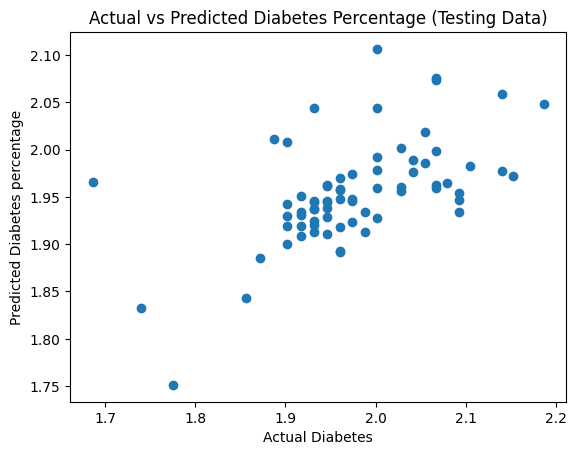

In [113]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Diabetes")
plt.ylabel("Predicted Diabetes percentage")
plt.title("Actual vs Predicted Diabetes Percentage (Testing Data)")

In [114]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.2628802866010689

/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


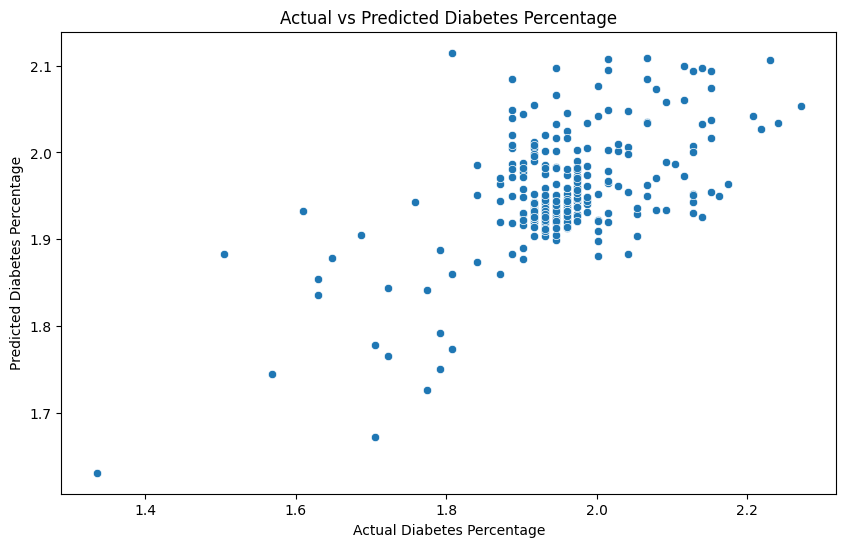

In [115]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=y_pred_train)
plt.title('Actual vs Predicted Diabetes Percentage')
plt.xlabel('Actual Diabetes Percentage')
plt.ylabel('Predicted Diabetes Percentage')
plt.show()

/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


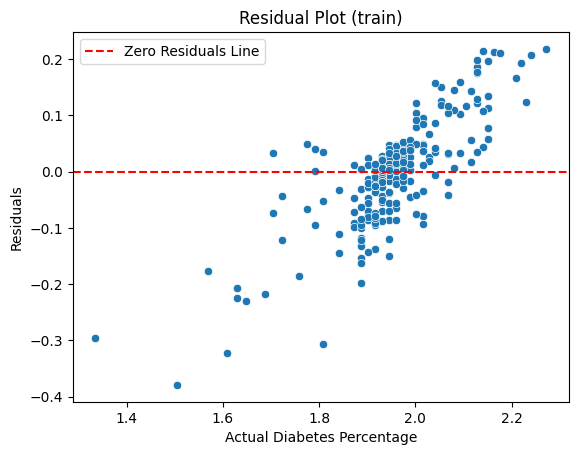

array([-1.86e-02, -1.69e-02, -2.76e-02,  2.63e-02,  1.51e-01,  2.13e-01,
        2.17e-02, -4.59e-02,  5.39e-03,  5.58e-02,  1.58e-02, -1.15e-02,
       -3.15e-02,  4.73e-02,  3.20e-02, -1.45e-01, -9.16e-02,  4.49e-02,
       -1.53e-01,  1.62e-02,  6.69e-02, -9.58e-03, -9.58e-02,  2.11e-01,
       -2.30e-02,  4.71e-02,  3.94e-02,  3.25e-02, -2.96e-01,  2.01e-02,
       -3.58e-02, -1.75e-02, -1.72e-02, -1.39e-02, -1.26e-02, -8.68e-02,
        3.10e-02,  1.89e-02, -3.38e-02, -1.12e-02, -7.01e-02,  5.25e-02,
       -4.63e-02, -9.56e-02, -7.51e-02, -6.61e-02,  2.89e-02,  2.54e-02,
       -1.43e-02,  4.71e-02, -4.31e-02,  4.61e-02,  4.97e-02,  1.14e-01,
        1.35e-02,  3.30e-02, -2.69e-03, -3.36e-02,  2.48e-02, -2.57e-02,
       -8.81e-02,  7.68e-03,  4.73e-02, -9.26e-02,  1.40e-02,  1.23e-02,
       -1.37e-02,  1.59e-01,  2.18e-01,  3.53e-02, -8.06e-02,  5.81e-02,
       -3.23e-01,  1.21e-01,  2.11e-02,  1.90e-02, -1.80e-02,  2.24e-02,
        3.74e-02, -1.21e-01, -6.18e-03,  1.08e-01, 

In [236]:
residuals = y_train - y_pred_train
sns.scatterplot(x=y_train, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residuals Line')
plt.title('Residual Plot (train)')
plt.xlabel('Actual Diabetes Percentage')
plt.ylabel('Residuals')
plt.legend()
plt.show()

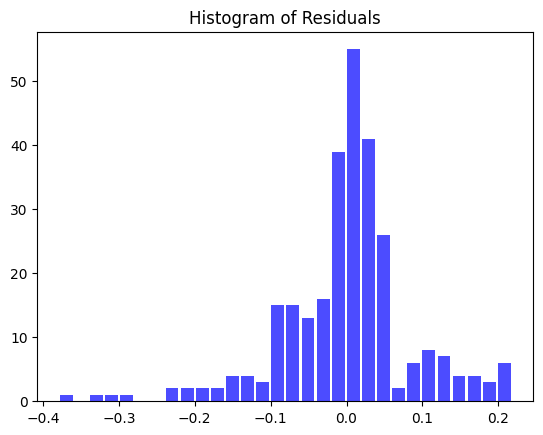

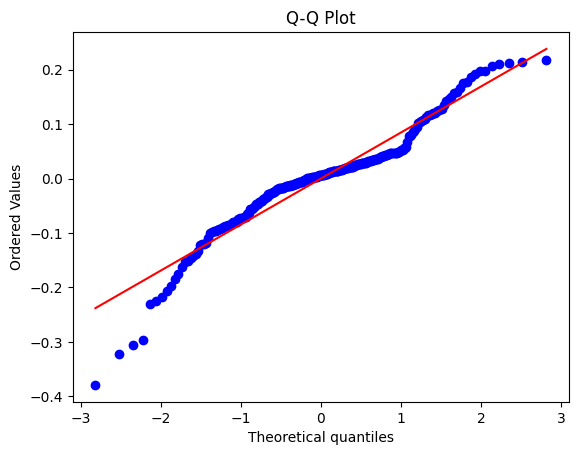

In [220]:
import scipy.stats as stats
plt.hist(residuals, bins='auto', color='blue', alpha=0.7, rwidth=0.85)
plt.title('Histogram of Residuals')
plt.show()

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

In [221]:
#Check for Normality
from scipy.stats import shapiro

_, p_value = shapiro(residuals)
print("Shapiro-Wilk p-value:", p_value)
if p_value < 0.05:
    print("Not normal")
else:
    print("Normal")

Shapiro-Wilk p-value: 5.73020131344748e-10
Not normal


In [222]:
from scipy.stats import anderson

result = anderson(residuals)
print("Anderson-Darling statistic:", result.statistic)
print("Anderson-Darling critical values:", result.critical_values)

Anderson-Darling statistic: 6.393397938350404
Anderson-Darling critical values: [0.57 0.65 0.78 0.91 1.08]


In [234]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
# Add a constant term to X_train for the intercept
X_train_with_constant = sm.add_constant(X_train)

# Perform Breusch-Pagan test
_, p_value, _, _ = sm.stats.diagnostic.het_breuschpagan(squared_residuals, X_train_with_constant)

print("Breusch-Pagan Test Results:")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Heteroskedasticity detected (reject null hypothesis)")
else:
    print("No evidence of heteroskedasticity")

Breusch-Pagan Test Results:
P-value: 0.23002700235252826
No evidence of heteroskedasticity


In [235]:
import statsmodels.api as sm
import statsmodels.stats.api as sms

# White Test
# Goldfeld-Quandt Test
gq_test_result = sms.het_goldfeldquandt(regressor.resid, X_train_with_constant)
gq_p_value = gq_test_result[1]

print("\nGoldfeld-Quandt Test Results:")
print(f"P-value: {gq_p_value}")

if gq_p_value < alpha:
    print("Heteroskedasticity detected (reject null hypothesis)")
else:
    print("No evidence of heteroskedasticity")




Goldfeld-Quandt Test Results:
P-value: 0.33672695597728547
No evidence of heteroskedasticity


/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


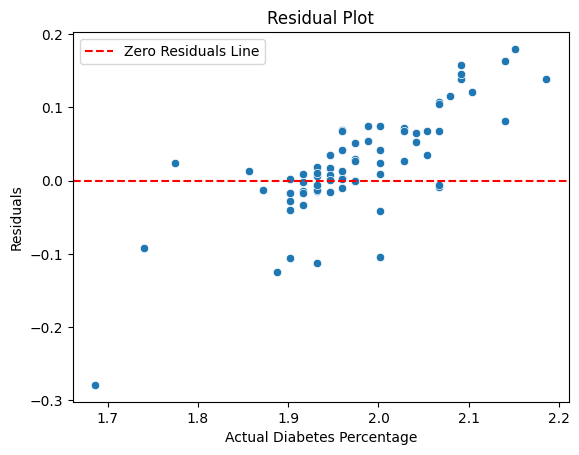

In [127]:
residuals_test = y_test - y_pred_test
sns.scatterplot(x=y_test, y=residuals_test)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residuals Line')
plt.title('Residual Plot')
plt.xlabel('Actual Diabetes Percentage')
plt.ylabel('Residuals')
plt.legend()
plt.show()


In [128]:
squared_residuals = residuals_train**2

In [129]:
squared_residuals_test = residuals_test**2

In [130]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
# Add a constant term to X_train for the intercept
X_train_with_constant = sm.add_constant(X_train)

# Perform Breusch-Pagan test
_, p_value, _, _ = sm.stats.diagnostic.het_breuschpagan(squared_residuals, X_train_with_constant)

# Print the results
print("Breusch-Pagan Test Results:")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Heteroskedasticity detected (reject null hypothesis)")
else:
    print("No evidence of heteroskedasticity")

Breusch-Pagan Test Results:
P-value: 0.23002700235252826
No evidence of heteroskedasticity


In [132]:
# Add a constant term to X_train for the intercept
X_test_with_constant = sm.add_constant(X_test)

# Perform Breusch-Pagan test
_, p_value, _, _ = sm.stats.diagnostic.het_breuschpagan(squared_residuals_test, X_test_with_constant)

# Print the results
print("Breusch-Pagan Test Results:")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Heteroskedasticity detected (reject null hypothesis)")
else:
    print("No evidence of heteroskedasticity")

Breusch-Pagan Test Results:
P-value: 0.18295881207728024
No evidence of heteroskedasticity


In [126]:
from sklearn.linear_model import LinearRegression

# Assuming X_test contains the independent variables
squared_regressor = LinearRegression()
squared_regressor.fit(X_train, squared_residuals)

#Why are we testing if the squared residuals can be predicted by the independent variables?
# The Breusch-Pagan test tests the hypothesis that the variance of the errors (residuals) in a regression model is constant across all levels of the independent variables. In other words, it checks for homoskedasticity, which is one of the assumptions of classical linear regression.
#If the variance of the residuals is constant (homoskedasticity), it means that the spread of the residuals is the same across all values of the independent variables. This is a key assumption for the validity of OLS (Ordinary Least Squares) estimates and their associated statistical tests.

# Predict the squared residuals
squared_residuals_pred = squared_regressor.predict(X_train)

In [92]:
# Percent-Point Function (PPF):
# The Percent-Point Function, also known as the inverse cumulative distribution function (CDF), helps you find a specific value in a probability distribution. Imagine you have a probability, and you want to know the corresponding value in your distribution. The PPF gives you that value.

# For example, let's say you have a normal distribution (bell curve) of test scores, and you know that a score is at the 80th percentile. You can use the PPF to find the test score that corresponds to this percentile.

# Cumulative Distribution Function (CDF):
# The Cumulative Distribution Function gives you the probability that a random variable takes a value less than or equal to a given point. It's like adding up all the probabilities of values up to a certain point.

# Continuing with the test score example, if you want to know the probability that a student scored below a certain score, you would use the CDF. It's a way of understanding the cumulative probability up to a specific value in your distribution.

# In simpler terms, PPF helps you find a value based on a probability, while CDF gives you the probability up to a certain value. They're both tools to understand and work with probability distributions.







In [124]:
from sklearn.metrics import mean_squared_error
from scipy.stats import chi2


# Null Hypothesis (H0): There is no heteroskedasticity; the variance of the residuals is constant.

# The alternative hypothesis (what you are testing for) would be:

# Alternative Hypothesis (H1): There is heteroskedasticity; the variance of the residuals is not constant.

print(squared_residuals_pred)

test_statistic = len(X_test) * mean_squared_error(squared_residuals, squared_residuals_pred) / 2
# critical_value = chi2.ppf(0.95, df=1)

# if test_statistic > critical_value:
#     print("Heteroskedasticity detected (reject null hypothesis)")
# else:
#     print("No evidence of heteroskedasticity (fail to reject null hypothesis)")
    
# print(test_statistic)

# Calculate the p-value
p_value = 1 - chi2.cdf(test_statistic, df=1)

# Significance level (alpha)
alpha = 0.05

# Compare p-value to significance level
if p_value <= alpha:
    print(f"Heteroskedasticity detected (reject null hypothesis) with p-value: {p_value}")
else:
    print(f"No evidence of heteroskedasticity (fail to reject null hypothesis) with p-value: {p_value}")

print("Test Statistic:", test_statistic)


[ 0.01  0.01  0.01  0.01  0.    0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.    0.01  0.01  0.01  0.01  0.    0.01  0.01  0.01  0.01  0.    0.01
  0.    0.01  0.    0.02  0.03  0.01  0.01  0.    0.01  0.    0.    0.01
  0.01  0.01  0.01  0.    0.01  0.01  0.    0.01  0.    0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.    0.01  0.01  0.01
  0.01  0.    0.01  0.01  0.01  0.01  0.    0.01  0.01  0.01  0.    0.01
  0.    0.01  0.01  0.01  0.01  0.01  0.    0.01  0.01  0.01  0.01  0.01
  0.01  0.    0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.    0.01  0.01  0.01  0.    0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.02  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.02  0.01
  0.02  0.01  0.01  0.01  0.01  0.01  0.01  0.    0.01  0.    0.    0.01
  0.    0.01  0.01  0.01  0.    0.01  0.01  0.01  0.01  0.    0.01  0.01
  0.01  0.01  0.01  0.01  0.02  0.01  0.01 -0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.02  0.01  0.01  0.01  0.01  0

In [94]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cross_val_r2 = cross_val_score(regressor, X_train, y_train, cv=5, scoring='r2')
cross_val_r2

array([0.5 , 0.14, 0.34, 0.31, 0.28])

In [229]:
cv_range = np.max(cross_val_r2) - np.min(cross_val_r2)
print("Range of R-squared: ", cv_range)
cv_std = np.std(cross_val_r2)
print("Standard Deviation of R-squared: ", cv_std)
q75, q25 = np.percentile(cross_val_r2, [75 ,25])
cv_iqr = q75 - q25
print("Interquartile Range of R-squared: ", cv_iqr)


Range of R-squared:  0.2924070839879689
Standard Deviation of R-squared:  0.0940412889655816
Interquartile Range of R-squared:  0.05280956747528154


In [ ]:
# If the range, standard deviation, or IQR is relatively small, it suggests that the model's performance is consistent across different folds.
# If the range, standard deviation, or IQR is large, it indicates a higher variance in performance, and the model may be sensitive to the choice of training data.